Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек. Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

**Переменные:**
- *Pregnancies* - Количество беременностей
- *Glucose* - Концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе
- *BloodPressure* - Диастолическое артериальное давление (мм рт.ст.)
- *SkinThickness* - Толщина кожной складки трицепса (мм)
- *Insulin* - 2-часовой сывороточный инсулин (мю Ед/мл)
- *BMI* - Индекс массы тела (вес в кг / (рост в м)^2 )
- *DiabetesPedigreeFunction* - Функция определения родословной диабета (DPF) оценивает вероятность диабета в зависимости от возраста субъекта и его семейного анамнеза
- *Age* - Возраст (лет)
- *Outcome* - Целевая переменная (0 или 1): 268 из 768 — 1, остальные — 0

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Сначала переименуем колонки DiabetesPedigreeFunction и Outcome.

In [3]:
diabetes.rename(columns={'Outcome': 'Diabetes', 'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

Проверим типы данных, наличие пропущенных значений и дубликатов.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Diabetes       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.duplicated().sum()

0

Пропущенных значений и дубликатов нет.

Посмотрим на графики распределения переменных и описательные статистики признаков.

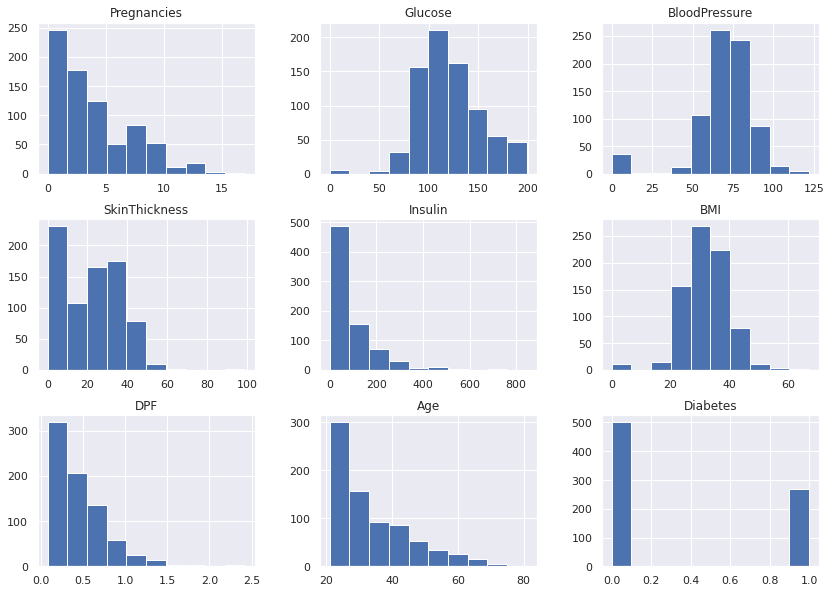

In [5]:
diabetes.hist(figsize=(14, 10))
plt.show()

In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


В данных имеются некорректные нулевые значения в таких признаках, как: Glucose, BloodPressure, SkinThickness, Insulin, BMI.

Для этих переменных заменим нули на nan, чтобы было удобнее работать с данными.

In [7]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[columns_to_fix] = diabetes[columns_to_fix].replace(0, np.nan)

# количество некорректных данных
diabetes.isna().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Diabetes           0
dtype: int64

В переменных *SkinThickness* и *Insulin* оказалось довольно много нулевых значений.

Проверим, как изменились распределения признаков без учета некорректных нулевых значений.

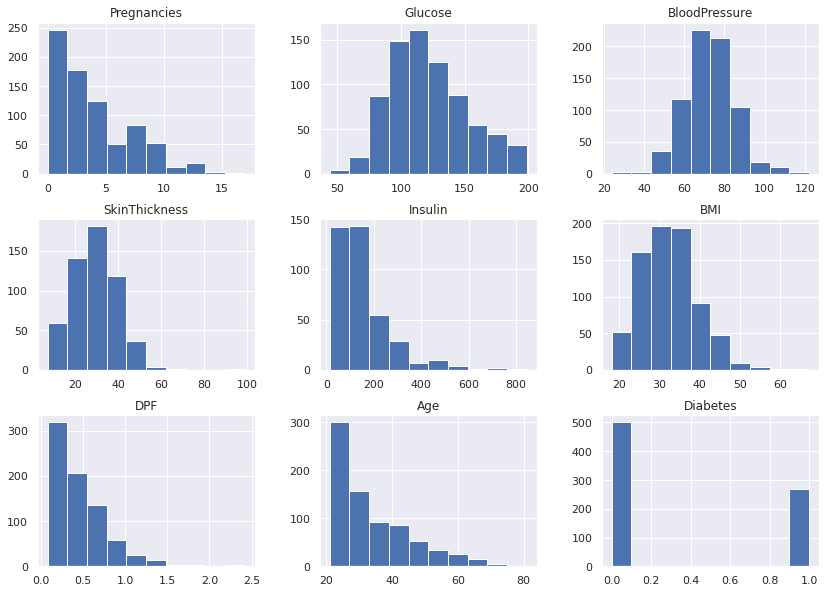

In [8]:
diabetes.hist(figsize=(14, 10))
plt.show()

In [9]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Можно заметить, что распределение переменных *Pregnancies, SkinThickness, Insulin, DPF, и Age* имеет положительную асимметрию, распределение переменных *Glucose и BMI* также смещено вправо, но менее выраженно. А переменная *BloodPressure* имеет распределение практически без перекоса.
- Половина наблюдаемых пациенток приходится на девушек от 21 до 29 лет, при этом самой старшей пациентке 81 год. Таким образом, преобладающее количество наблюдений собрано среди более молодого населения.
- Кроме этого 75% наблюдаемых пациенток имели не больше 6 беременностей.

*Вопросы, на которые хотелось бы ответить:*
- какие показатели сильнее всего связаны с диабетом?
- есть ли взаимосвязь между возрастом и остальными переменными?
- оказывает ли влияние число беременностей на показатели крови, давление, BMI и DPF?

Посмотрим на распределение признаков с помощью боксплота.

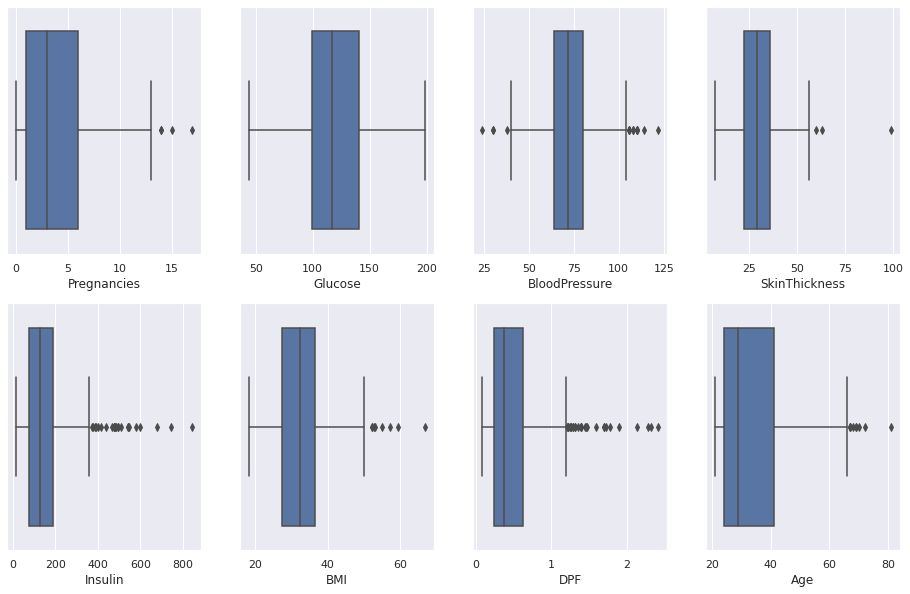

In [10]:
plt.figure(figsize=(16, 10))

for index, col in enumerate(diabetes.columns[:-1]):
    plt.subplot(2,4,index+1)
    sns.boxplot(x=diabetes[col])

plt.show()

В данных оказалось довольно много выбросов, особенно в переменных Insulin, BMI, DPF и Age. 

Удалим экстремально отклоняющиеся значения, выходящие за пределы трех сигм.

In [11]:
df = diabetes
feature_to_fix = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']

for col in feature_to_fix:
    col_mean = df[col].mean()
    col_sigma = df[col].std()
    index_outliers = df[(df[col] > col_mean + 3*col_sigma) | (df[col] < col_mean - 3*col_sigma)].index
    df.drop(index_outliers, inplace=True)

**Исследование зависимостей между признаками.**

Построим парную диаграмму - с ее помощью можно визуально оценить попарное взаимодействие переменных.

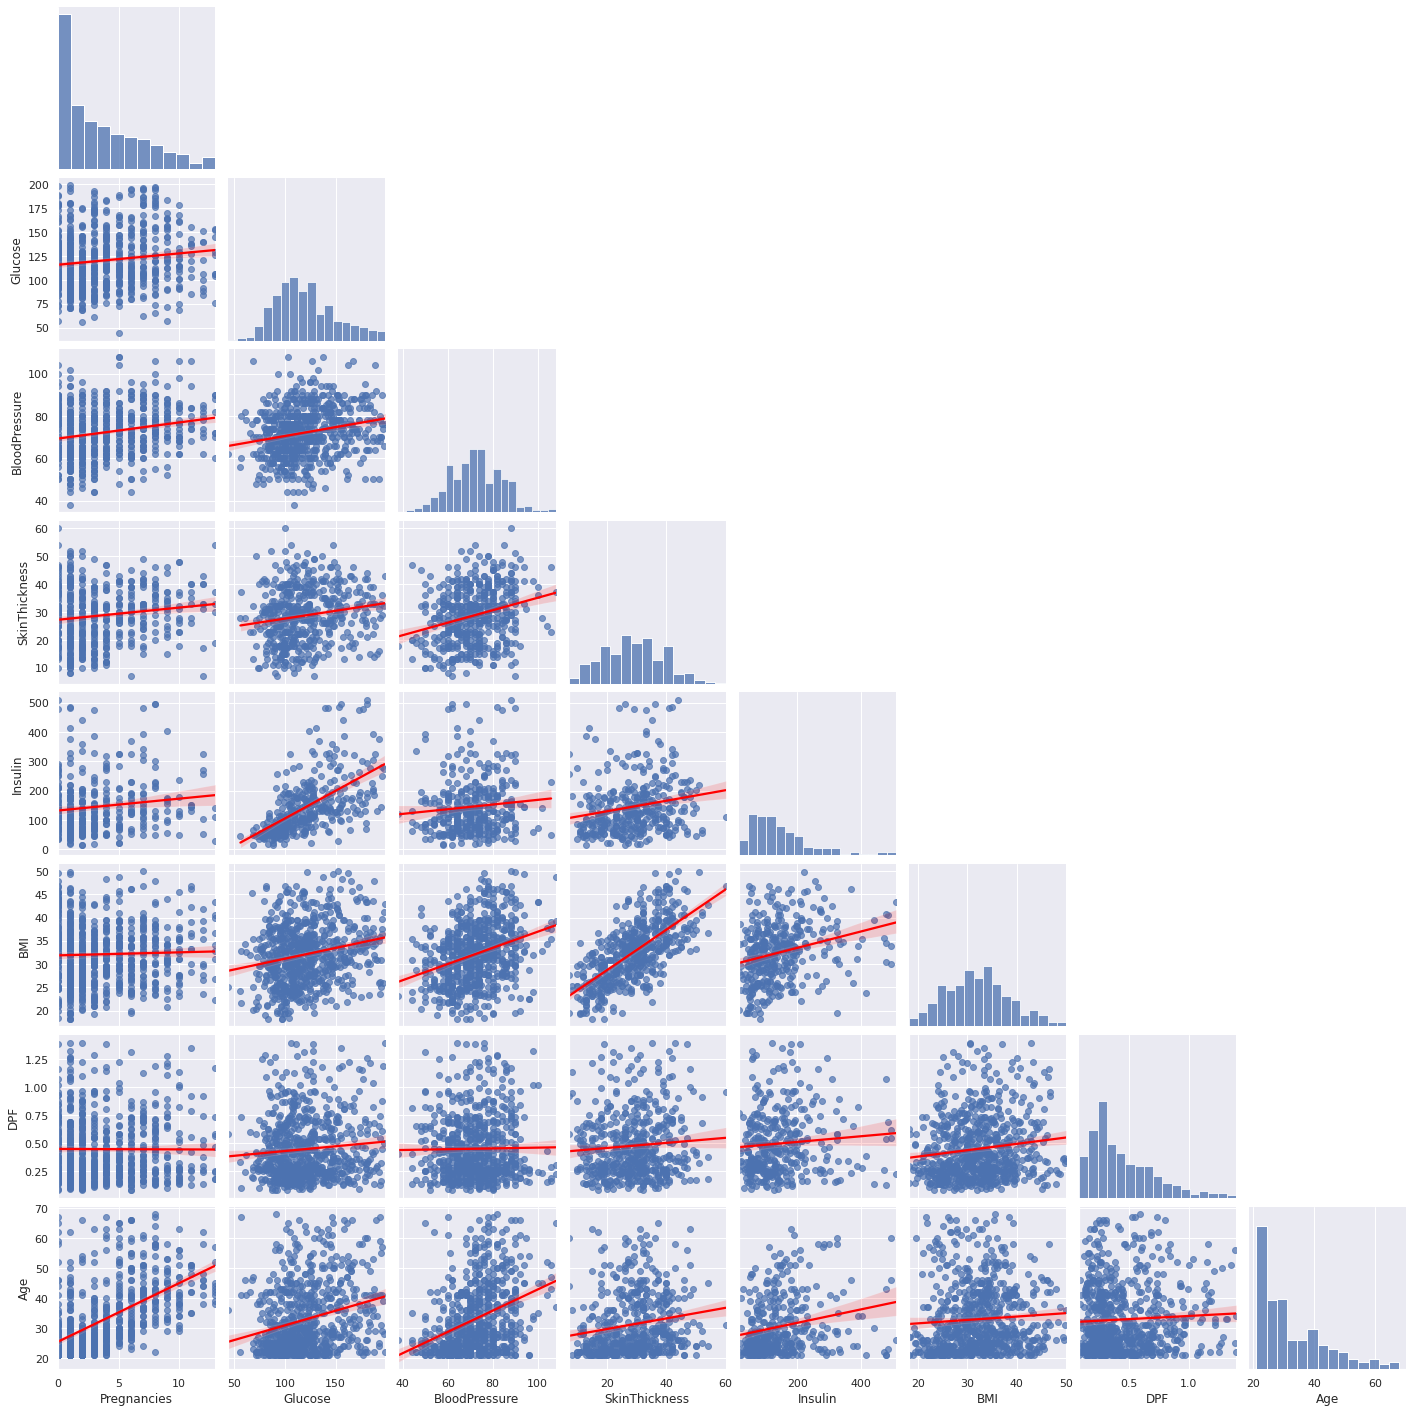

In [12]:
feature = df.columns[:-1]
sns.pairplot(df[feature], corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}})
plt.show()

Среди полученных диаграмм рассеивания можно предположить некоторую положительную корреляцию для переменных *SkinThickness и BMI*, а также для *Insulin и Glucose*.

Рассчитаем матрицу корреляции, используя корреляцию Спирмена, т.к. распределения переменных ассиметричны и присутствует большое количество выбросов.

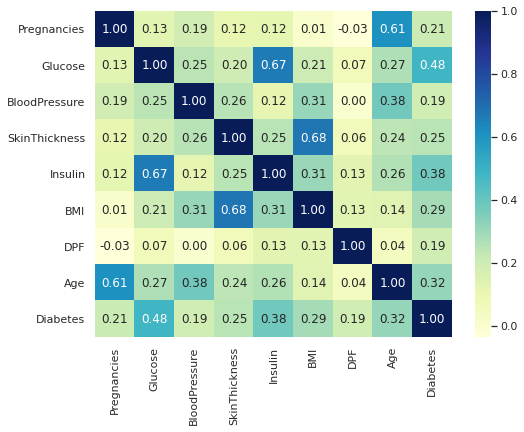

In [13]:
plt.figure(figsize=(8, 6))

corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')

plt.show()

Среди признаков наибольшая корреляция наблюдается для переменных *SkinThickness* и *BMI* (r = 0,68), а также для *Glucose* и *Insulin* (r = 0,67). 

Также довольно высокая положительная связь выявлена для переменных *Age* и *Pregnancies* (r = 0,61).

Кроме этого можно заметить, что с **возрастом** в большей степени связано BloodPressure (r = 0,38), чем Glucose (r = 0,27), Insulin (r = 0,26) и SkinThickness (r = 0,24). И довольно слабая взаимосвязь обнаружена для переменных Age и BMI (r = 0,14) и переменных Age и DPF (r = 0,04).

У **числа беременностей** выявлена слабая взаимосвязь со всеми признаками, кроме возраста.

Что касается **диабета**, то для него обнаружена наибольшая взаимосвязь с переменными Glucose (r = 0,48) и  Insulin (r = 0,38), в меньшей степени с переменными Age (r = 0,32), BMI (r = 0,29), SkinThickness (r = 0,25), Pregnancies (r = 0,21) и меньше всего с переменными BloodPressure (r = 0,19) и DPF (r = 0,19).

Можно проверить статистическую значимость выявленных взаимосвязей.

In [14]:
res = st.spearmanr(df['SkinThickness'], df['BMI'], nan_policy='omit')
print('Корреляция между SkinThickness и BMI:', res[0], 'p-value:', res[1])
res = st.spearmanr(df['Glucose'], df['Insulin'], nan_policy='omit')
print('Корреляция между Glucose и Insulin:', res[0], 'p-value:', res[1])

Корреляция между SkinThickness и BMI: 0.6824261328255358 p-value: 6.968708262105709e-71
Корреляция между Glucose и Insulin: 0.6666265084916276 p-value: 1.2227786793203916e-48


В данном случае мы проверяем гипотезу о том, что корреляция между двумя переменными равна нулю (нулевая гипотеза), и альтернативную гипотезу - что корреляция между переменными отлична от нуля.

Так как в обоих случах p-value < 0.05 (типичное пороговое значение), то можно сделать вывод о том, что обнаруженные взаимосвязи между переменными **SkinThickness** и **BMI** и переменными **Glucose** и **Insulin** статистически значимы.

Проверим стат значимость результатов коэффициентов корреляции для возраста и трех переменных с наибольшим показателем корреляции.

In [15]:
columns = ['Pregnancies', 'BloodPressure', 'Glucose']
for col in columns:
    res = st.spearmanr(df['Age'], df[col], nan_policy='omit')
    print(f'Корреляция между Age и {col}:', res[0], 'p-value:', res[1])

Корреляция между Age и Pregnancies: 0.6118665677817237 p-value: 8.882615951662356e-76
Корреляция между Age и BloodPressure: 0.37874726507811574 p-value: 4.636425468957789e-25
Корреляция между Age и Glucose: 0.2697516110161188 p-value: 1.7365169371282483e-13


Корреляция между возрастом и переменными: количество беременностей, давление, глюкоза также статистически значима.

Теперь посмотрим на корреляцию между диабетом и всеми признаками.

In [16]:
feature = df.columns[:-1]
for col in feature:
    res = st.spearmanr(df['Diabetes'], df[col], nan_policy='omit')
    print(f'Корреляция между диабетом и {col}:', res[0], 'p-value:', res[1])

Корреляция между диабетом и Pregnancies: 0.20808529037399456 p-value: 1.521439648900707e-08
Корреляция между диабетом и Glucose: 0.4842544942395518 p-value: 1.1593415301151816e-43
Корреляция между диабетом и BloodPressure: 0.19394939709757608 p-value: 2.6692889476082694e-07
Корреляция между диабетом и SkinThickness: 0.2515457720656661 p-value: 8.718001171176911e-09
Корреляция между диабетом и Insulin: 0.38334504382219836 p-value: 2.304816921416073e-14
Корреляция между диабетом и BMI: 0.28721224624928315 p-value: 4.3969649538707956e-15
Корреляция между диабетом и DPF: 0.19439989429240537 p-value: 1.296031843824759e-07
Корреляция между диабетом и Age: 0.3162740439322453 p-value: 2.496360532909653e-18


Для всех имеющихся признаков характерна высокая степень значимости корреляции с диабетом.

---

Выше была выявлена слабая положительная связь высокой степени значимости между наличием диабета и числом беременностей: r = 0,21 при p < 0,001. Теперь попробуем определить связано ли наличие беременностей с диабетом при помощи критерия независимости хи-квадрат.

Создадим датафрейм с данным по диабету и наличием беременностей (pregnancy) со значениями 1 при наличии беременностей и 0 при отсутствии.

In [17]:
pregnancy_data = pd.DataFrame()
pregnancy_data['pregnancy'] = df['Pregnancies'].apply(lambda x: 1 if x > 0 else 0)
pregnancy_data['diabetes'] = df['Diabetes']

In [18]:
pregnancy_data.head(3)

,pregnancy,diabetes
0,1,1
1,1,0
2,1,1


Теперь составим таблицу сопряженности двух категориальных признаков.

In [19]:
tab = pd.crosstab(pregnancy_data['pregnancy'], pregnancy_data['diabetes'])
tab

diabetes,0,1
pregnancy,,
0,70,33
1,410,213


In [20]:
print(f'Среди женщин, у которых не было беременностей, диабет диагностирован для {round(33/(33+70)*100, 1)}%, среди женщин, имеющих беременности - для {round(213/(213+410)*100, 1)}%')

Среди женщин, у которых не было беременностей, диабет диагностирован для 32.0%, среди женщин, имеющих беременности - для 34.2%


Критерий независимости хи-квадрат проверяет следующие гипотезы:
- H0: Две переменные не зависят друг от друга.
- H1: Две переменные не являются независимыми.

In [21]:
st.chi2_contingency(tab)

(0.09910074302651277,
 0.7529114578509389,
 1,
 array([[ 68.09917355,  34.90082645],
        [411.90082645, 211.09917355]]))

Поскольку p-значение теста (0,75) > 0,05, нет оснований отвергнуть нулевую гипотезу. Это означает, что у нас нет достаточных доказательств, чтобы сказать, что существует связь между диагностированным диабетом и наличием беременностей.

Другими словами, наличие диабета и наличие беременностей не зависят друг от друга.

Среди факторов, способствующих развитию диабета, отмечаются такие как: возраст 45 лет и старше, а также избыточная масса тела и ожирение (BMI ≥ 25 кг/м2).

Проверим это на имеющихся данных с помощью критерия независимости хи-квадрат.

In [22]:
age_bmi_data = pd.DataFrame()
age_bmi_data['diabetes'] = df['Diabetes']
age_bmi_data['age_over_45'] = df['Age'].apply(lambda x: 1 if x >= 45 else 0)
age_bmi_data['bmi_over_25'] = df['BMI'].apply(lambda x: 1 if x >= 25 else 0)

In [23]:
age_tab = pd.crosstab(age_bmi_data['age_over_45'], age_bmi_data['diabetes'])
age_tab

diabetes,0,1
age_over_45,,
0,420,188
1,60,58


In [24]:
bmi_tab = pd.crosstab(age_bmi_data['bmi_over_25'], age_bmi_data['diabetes'])
bmi_tab

diabetes,0,1
bmi_over_25,,
0,102,9
1,378,237


In [25]:
print(f'Среди женщин младше 45 лет диабет диагностирован для {round(188/(188+420)*100, 1)}%, среди женщин от 45 лет - для {round(58/(58+60)*100, 1)}%')
print(f'Среди женщин с BMI < 25 диабет диагностирован для {round(9/(9+102)*100, 1)}%, среди женщин с BMI > 25 - для {round(237/(237+378)*100, 1)}%')

Среди женщин младше 45 лет диабет диагностирован для 30.9%, среди женщин от 45 лет - для 49.2%
Среди женщин с BMI < 25 диабет диагностирован для 8.1%, среди женщин с BMI > 25 - для 38.5%


In [26]:
result = st.chi2_contingency(age_tab)
print('Для возраста p-value: ', result[1])

Для возраста p-value:  0.00019701012664366844


In [27]:
result = st.chi2_contingency(bmi_tab)
print('Для BMI p-value: ', result[1])

Для BMI p-value:  9.07099286579571e-10


В обоих случаях получили p-value < 0.05. Таким образом, у нас есть основания отвергнуть нулевую гипотезу о том, что между исследуемыми переменными нет стат значимой взаимосвязи.

Другими словами, возраст от 45 лет и избыточная масса тела взаимосвязаны с риском развития диабета.

---

**Сравнение признаков по группам.**

Теперь посмотрим, как выглядят распределения признаков в разных группах при наличии и отсутствии диабета.

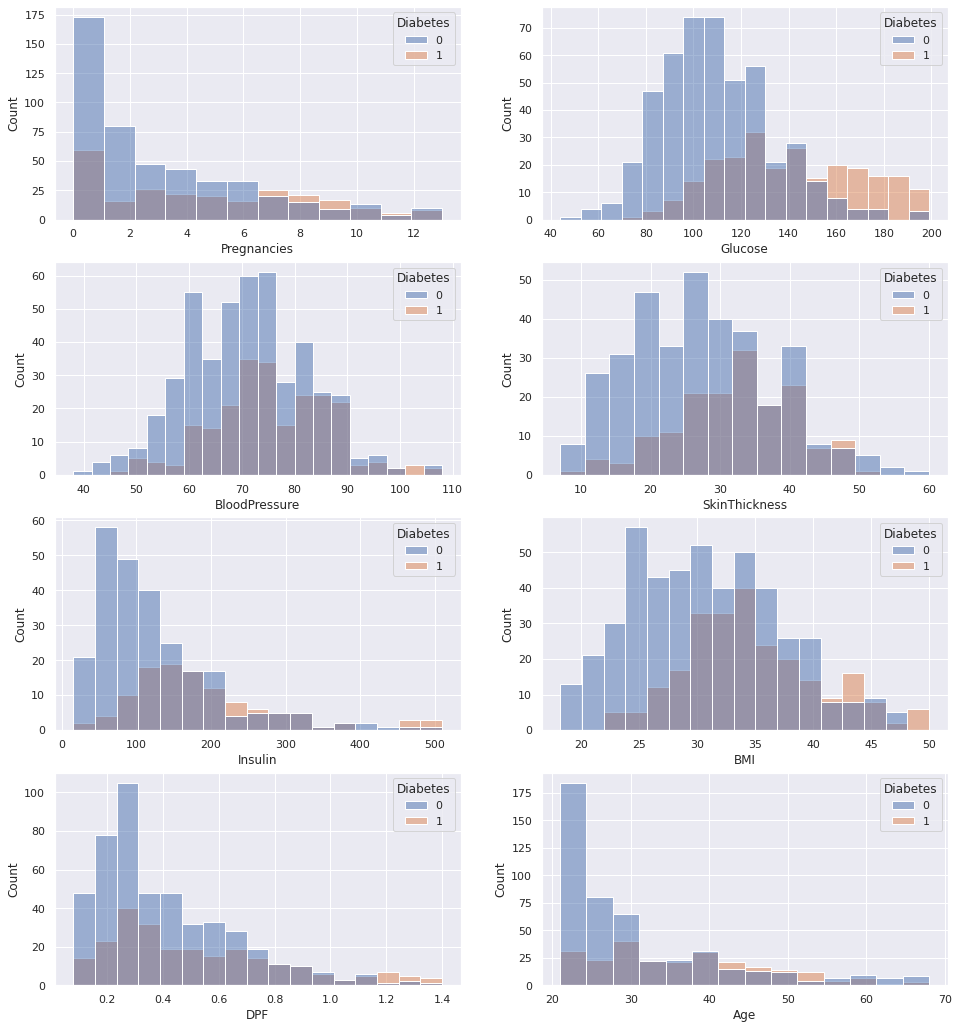

In [28]:
plt.figure(figsize=(16, 18))

for index, col in enumerate(df.columns[:-1]):
    plt.subplot(4,2,index+1)
    sns.histplot(data=df, x=col, hue='Diabetes')

plt.show()

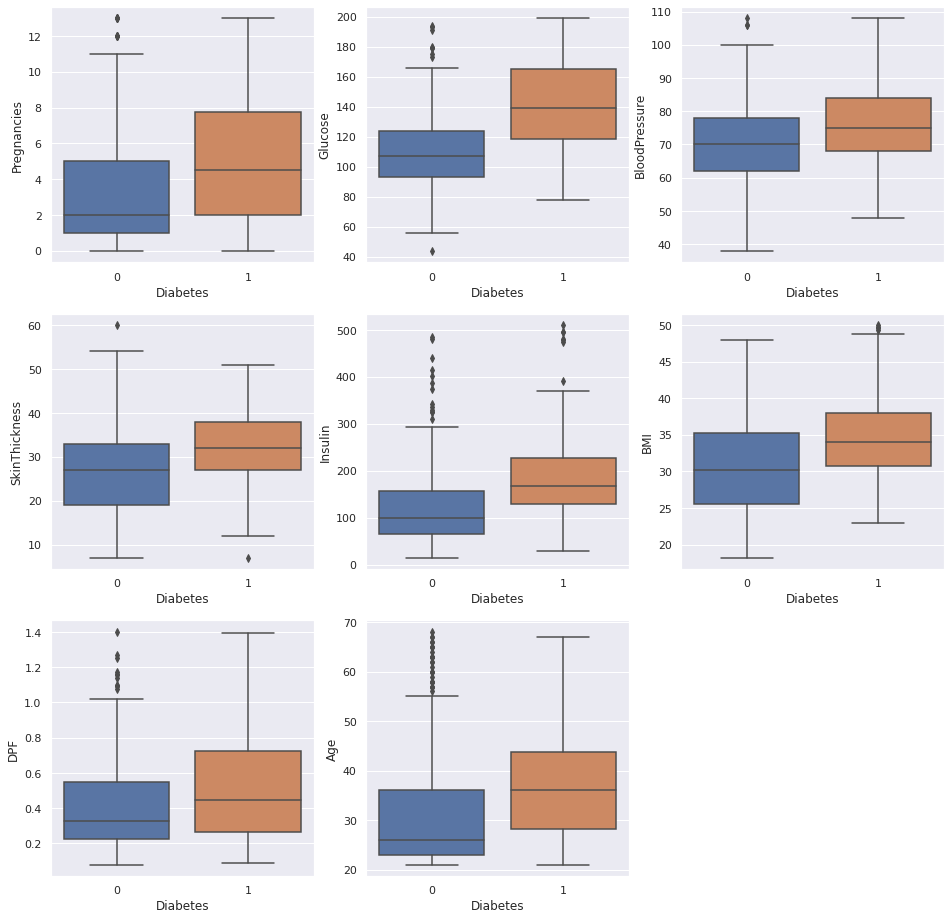

In [29]:
plt.figure(figsize=(16, 16))

for index, col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,index+1)
    sns.boxplot(x='Diabetes', y=col, data=df)

plt.show()

По всем признакам для группы с выявленным дабетом наблюдается смещение квартилей в сторону увеличения, так же, как и минимальные значения для большинства признаков в группе с диабетом выше чем минимальные значения в группе без диабета.

Парная диаграмма:

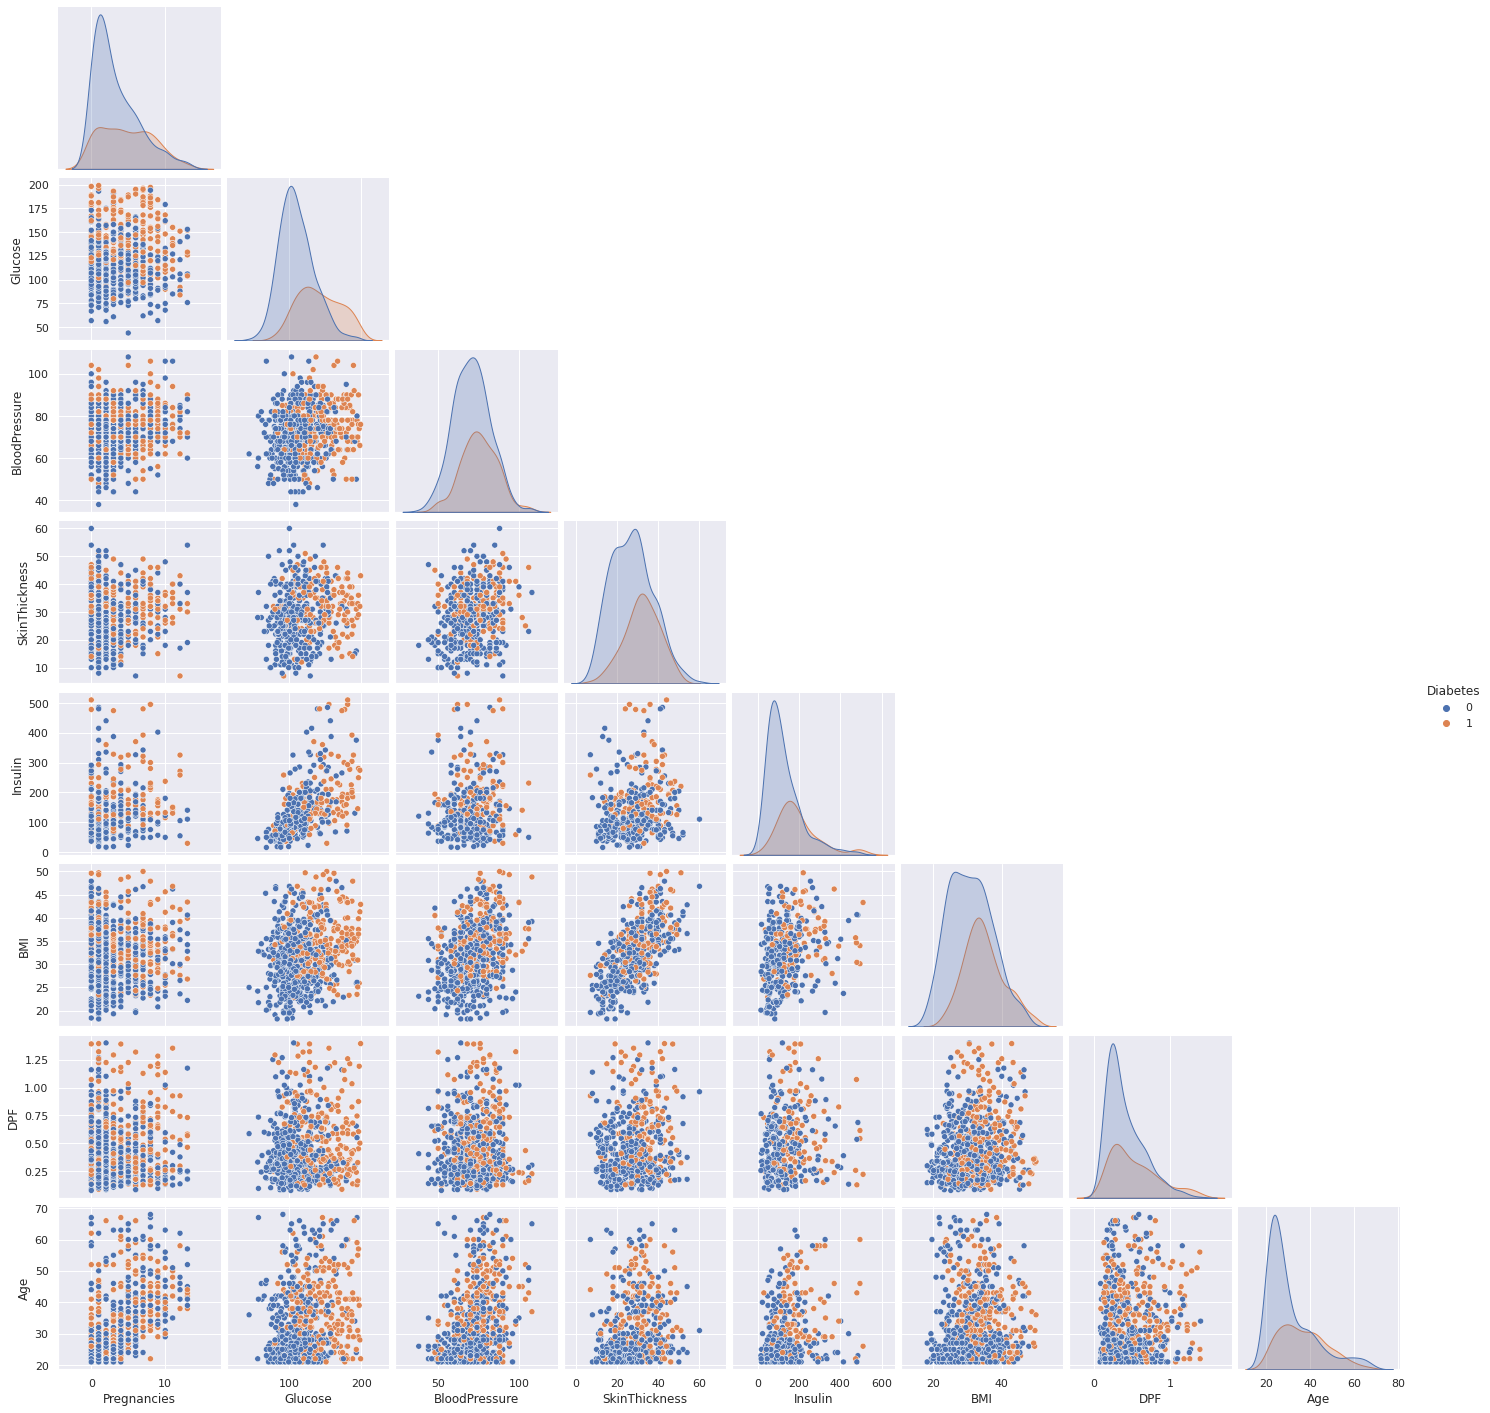

In [30]:
sns.pairplot(df, hue="Diabetes", corner=True)
plt.show()

Проверим, насколько статистически значимы различия признаков между группами.

In [31]:
feature = df.columns[:-1]
for col in feature:
    res = st.ttest_ind(df[df.Diabetes == 1][col], df[df.Diabetes == 0][col], equal_var=False, nan_policy='omit')
    print(f'{col}:', 'p-value', res[1])

Pregnancies: p-value 1.4257499247241589e-08
Glucose: p-value 1.0087378580565932e-38
BloodPressure: p-value 2.932491115053372e-07
SkinThickness: p-value 1.6670728725611003e-08
Insulin: p-value 1.929850068755151e-09
BMI: p-value 3.627151310622015e-16
DPF: p-value 6.665044454747391e-08
Age: p-value 3.73270947848208e-12


Так как для всех признаков полученное p-value < 0.05 можно сделать вывод, что распределения признаков в группах с наличием и отсутствием диабета статистически значимо различаются.

---

**ВЫВОДЫ**

Распределения признаков в группах с наличием и отсутствием диабета статистически значимо различаются.

В процессе корреляционного анализа зависимости диабета и имеющихся признаков выявлена статистически значимая корреляция со всеми признаками, наибольшая взаимосвязь была выявлена между диабетом и уровнем глюкозы: r = 0,48 при p ≤ 0,001.

Кроме этого, среди признаков наибольшая корреляция обнаружена для переменных SkinThickness и BMI (r = 0,68) и для переменных Glucose и Insulin (r = 0,67).

У возраста наибольшая корреляция обнаружена с Pregnancies (r = 0,61), BloodPressure (r = 0,38) и Glucose (r = 0,27).

Для переменной Pregnancies не было выявлено существенной корреляции с какими-либо признаками, кроме возраста (r = 0,61).

Также, была доказана взаимосвязь развития диабета и таких факторов как: избыточная масса тела и ожирение (BMI ≥ 25 кг/м2) и возраст ≥ 45 лет. В то время, как связь между наличием/отсутствием беременностей и наличием диабета не была подтвержена.